In [4]:
from experiments.ina_schneider import (schneider_iv,
                                    schneider_tauf,
                                    schneider_taum,
                                    schneider_taus,
                                      schneider_inact,
                                      schneider_reduc,
                                      schneider_recov)

from experiments.ina_sakakibara import (sakakibara_iv_Nao2 ,
                                                sakakibara_iv_Nao5 ,
                                                sakakibara_iv_Nao20 ,
                                                sakakibara_act,
                                                sakakibara_inact,
                                                sakakibara_inact_kin_1,
                                                sakakibara_inact_kin_2,
                                                sakakibara_recov,
                                                sakakibara_recov_kin)                                   

from ionchannelABC.experiment import setup
from ionchannelABC.visualization import plot_sim_results
import pandas as pd
from pyabc import History
import os, tempfile
modelfile = 'models/nygren_Na.mmt'

In [2]:
observations, model, summary_statistics = setup(modelfile,
                                                schneider_iv,
                                                schneider_tauf, 
                                    schneider_taum,
                                    schneider_taus,
                                      schneider_inact,
                                      schneider_reduc,
                                      schneider_recov)

#print(observations)
assert len(observations)==len(summary_statistics(model({})))

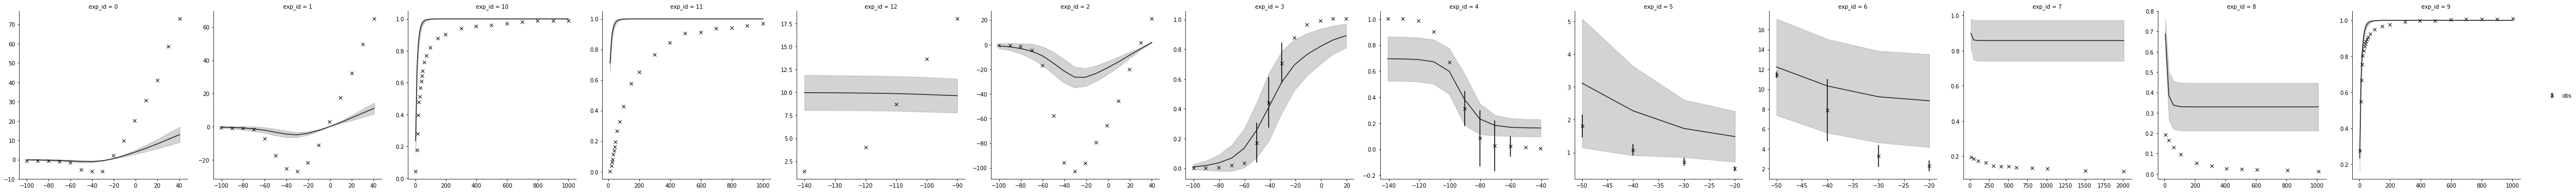

In [5]:
db_path = ("sqlite:///" +
           os.path.join(tempfile.gettempdir(), "nygren_ina_testing.db"))
history = History(db_path)
history.id = 41 
df, w = history.get_distribution(m=0)

"""
samples = pd.DataFrame({})
results = summary_statistics(model({}))
output = pd.DataFrame({'x': observations.x, 'y': list(results.values()),
                       'exp_id': observations.exp_id})
output['sample'] = 0
output['distribution'] = 'post'
samples = samples.append(output, ignore_index=True)
"""

g = plot_sim_results(modelfile, sakakibara_iv_Nao2 ,
                                                sakakibara_iv_Nao5 ,
                                                sakakibara_iv_Nao20 ,
                                                sakakibara_act,
                                                sakakibara_inact,
                                                sakakibara_inact_kin_1,
                                                sakakibara_inact_kin_2,
                                                sakakibara_recov,
                                                sakakibara_recov_kin, df=df, w=w) 